In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
selected_data_A = pd.read_excel("../data/processed/wax_selected_A.xls", index_col=0)

selected_data_B = pd.read_excel("../data/processed/wax_selected_B.xls", index_col=0)

In [169]:
# recoding
coder = {"a": 1, "b": 2, "c": 3, "d": 4, "h": 5, "-":0}
coder_genotype = {"a": "Homozygous type 1", "b": "Homozygous type 2", "c": "Homozygous type 2 or heterozygous", "d": "Homozygous 1 or heterozygous", "h": "Heterozygous", "-": "Unknown"}

encoder_keys = coder.keys()
encoder_values = coder.values()

encoder = dict(zip(encoder_values, encoder_keys))

In [160]:
for col in selected_data_A.columns.tolist():
    if col != "wax":
        selected_data_A[col] = selected_data_A[col].map(encoder)
        selected_data_A[col] = selected_data_A[col].map(coder_genotype)
    else:
        selected_data_A[col] = selected_data_A[col].map({1: "wax", 0: "wax-less"})
        
for col in selected_data_B.columns:
    if col != "wax_F2":
        selected_data_B[col] = selected_data_B[col].map(encoder)
        selected_data_B[col] = selected_data_B[col].map(coder_genotype)

    else:
        selected_data_B[col] = selected_data_B[col].map({1: "wax", 0: "wax-less"})

In [161]:
markers_A = selected_data_A.columns.to_list()
markers_A.remove("wax")

markers_B = selected_data_B.columns.to_list()
markers_B.remove("wax_F2")

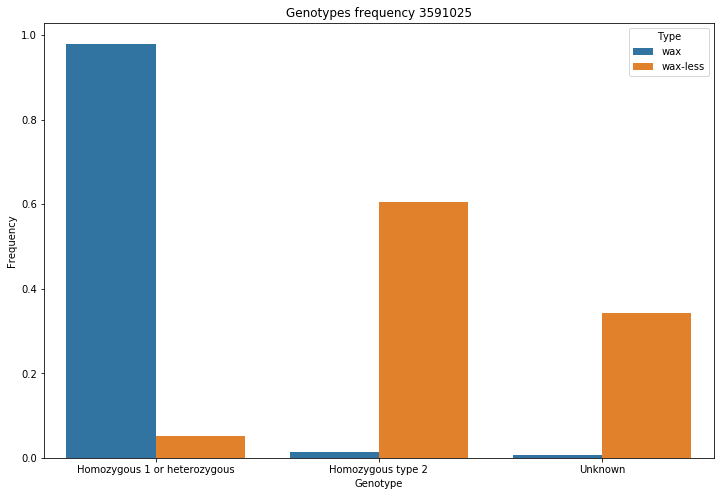

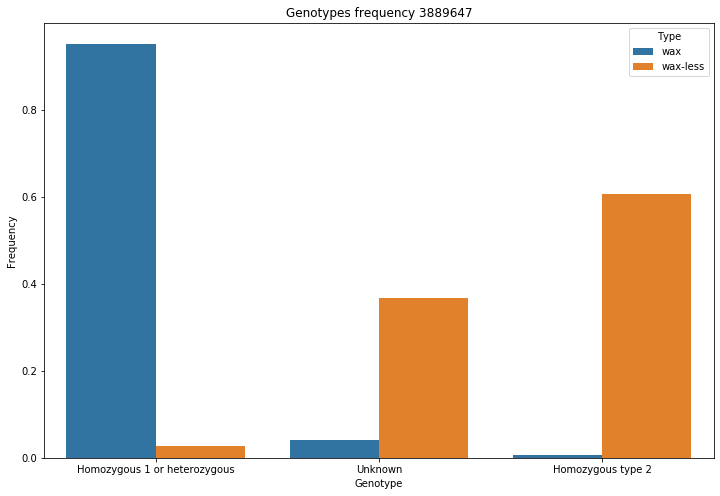

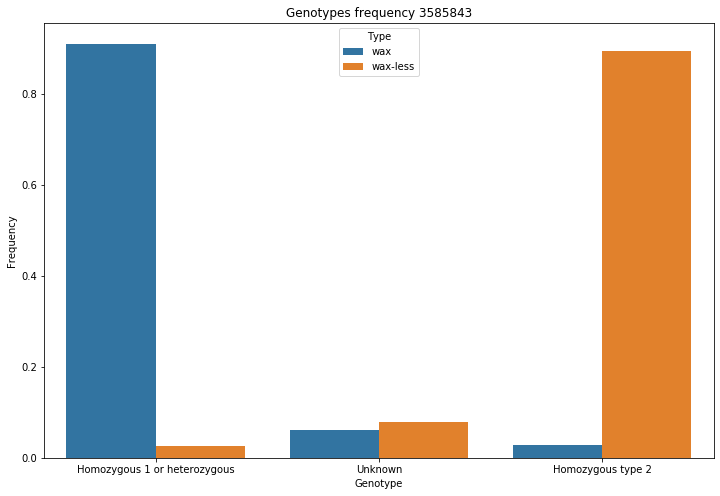

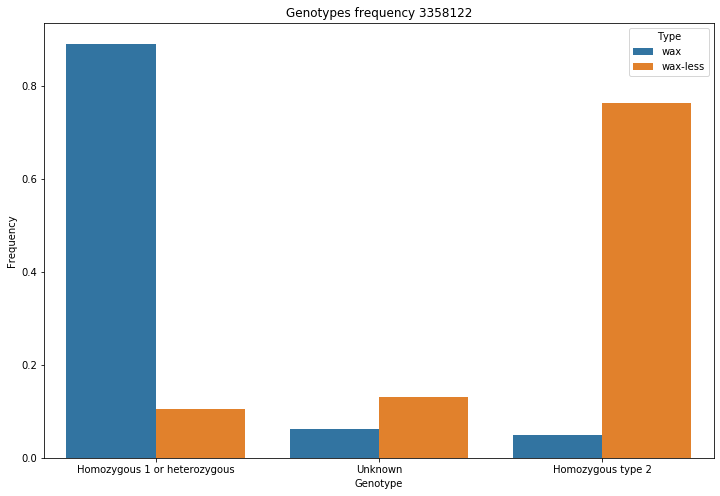

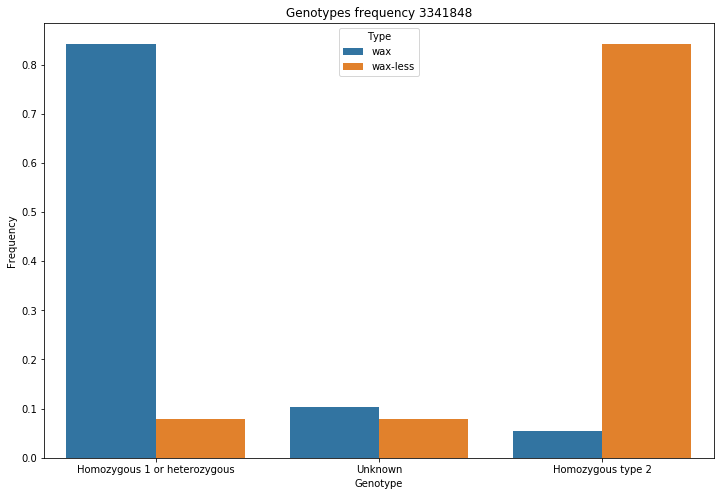

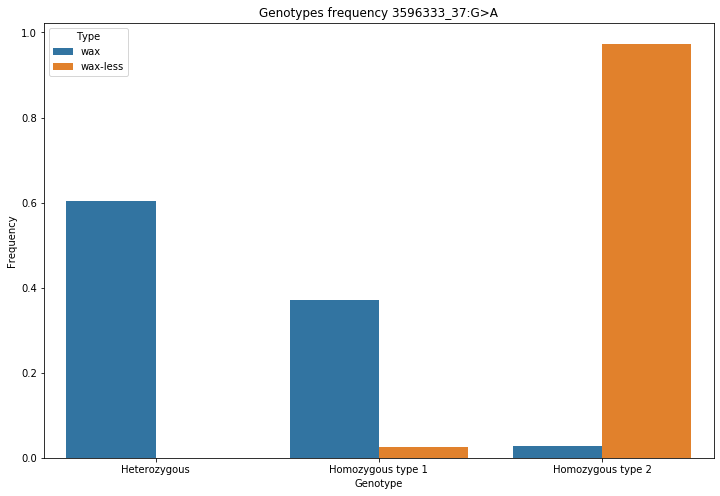

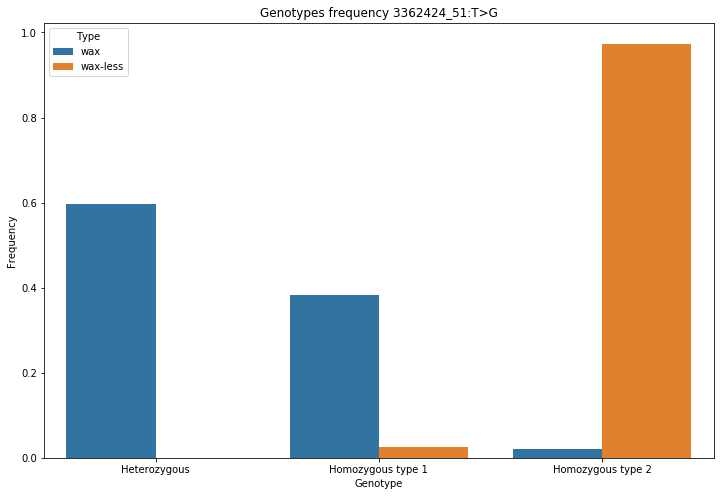

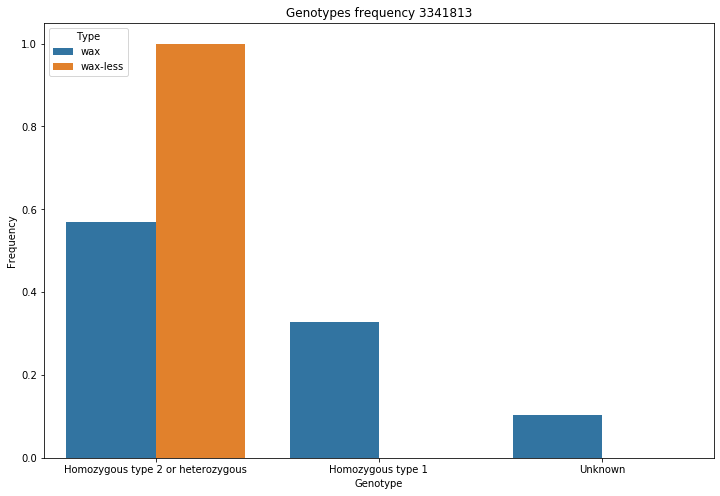

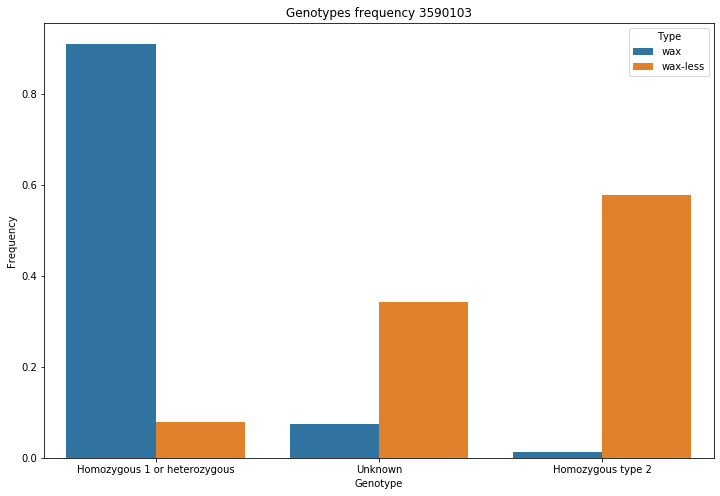

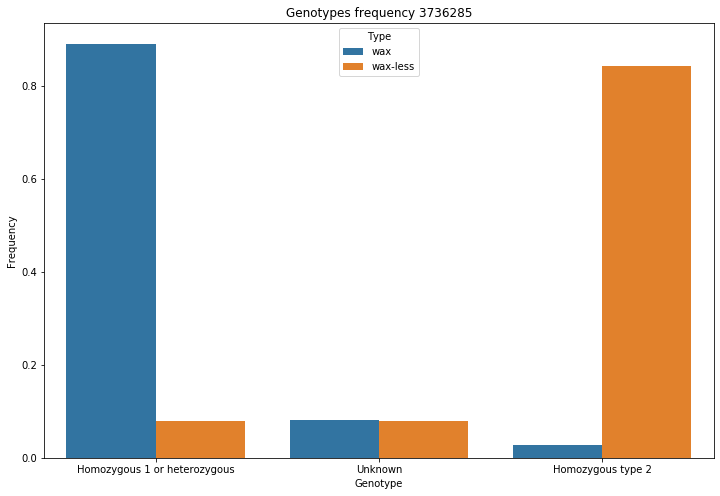

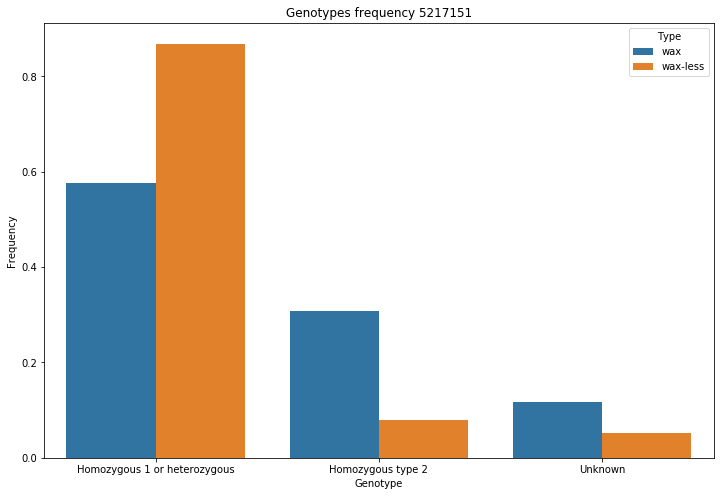

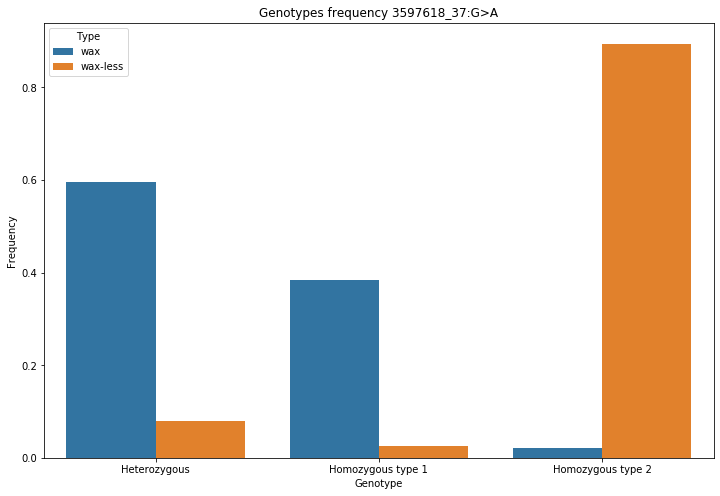

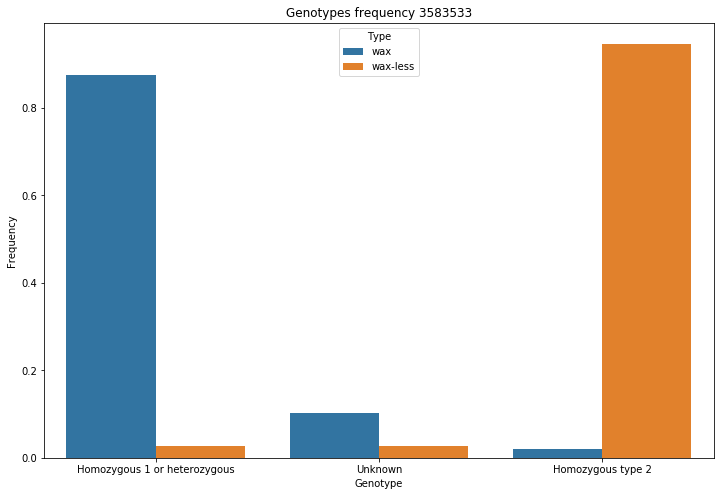

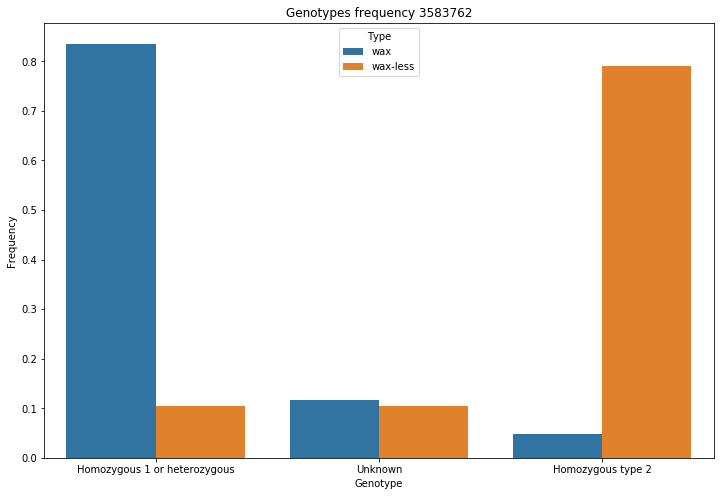

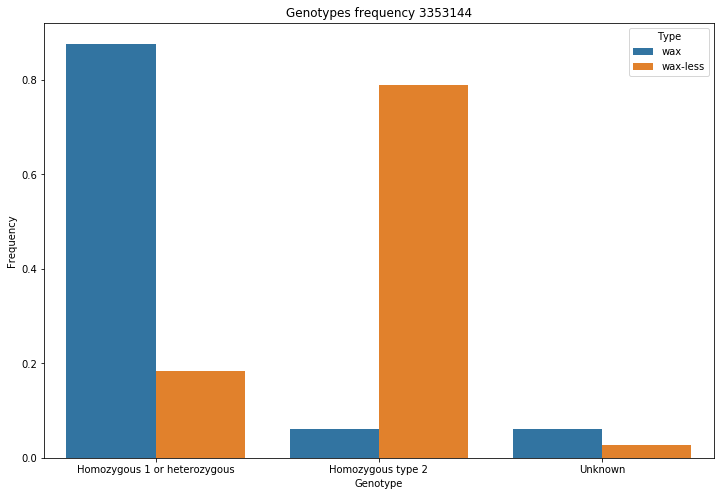

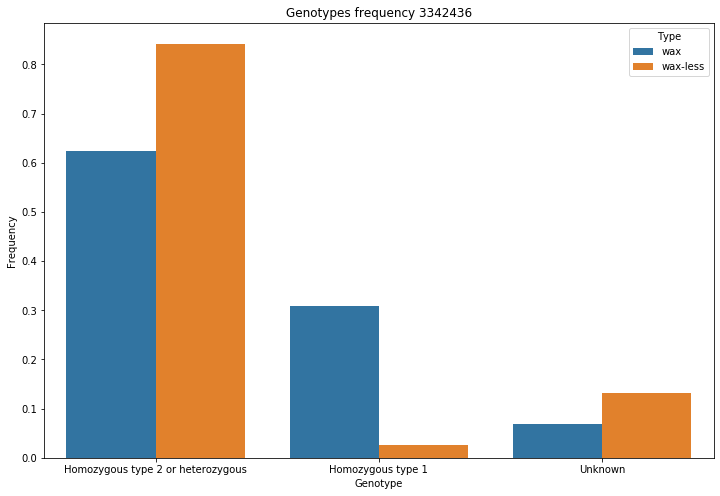

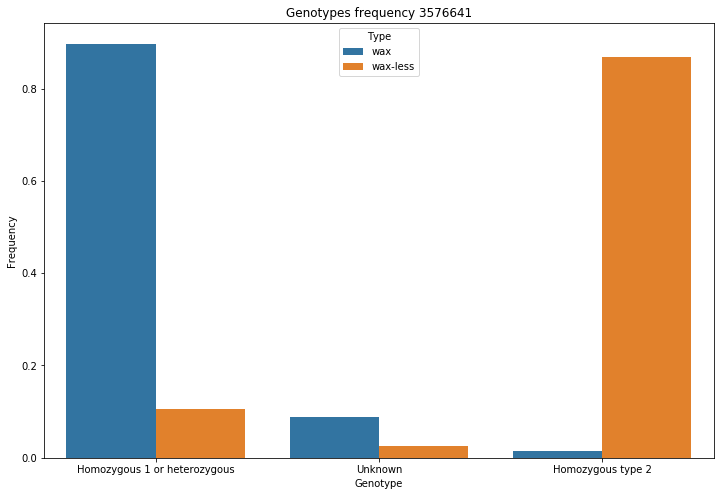

In [164]:
for marker in markers_A:
    data = selected_data_A[[marker, "wax"]]
    
    wax = data[data["wax"] == "wax"][marker].value_counts() / data[data["wax"] == "wax"][marker].shape[0]
    wax_less = data[data["wax"] == "wax-less"][marker].value_counts() / data[data["wax"] == "wax-less"][marker].shape[0]
    
    summary_wax = {"Frequency": wax}
    summary_wax = pd.DataFrame.from_dict(summary_wax, orient='columns')
    summary_wax[""] = ""
    summary_wax["Type"] = "wax"
    
    summary_waxless = {"Frequency": wax_less}
    summary_waxless = pd.DataFrame.from_dict(summary_waxless, orient='columns')
    summary_waxless[""] = ""
    summary_waxless["Type"] = "wax-less"
    
    summary = pd.concat((summary_wax, summary_waxless), axis=0)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot()
    ax.set_title(f"Genotypes frequency {marker}")
    ax.set_xlabel("Genotype")
    sns.barplot(data=summary, x=summary.index, y="Frequency", hue="Type", ax=ax)
    
    plt.show()
    fig.savefig(f"../data/processed/plots/set_A/{marker}.png")
    del fig

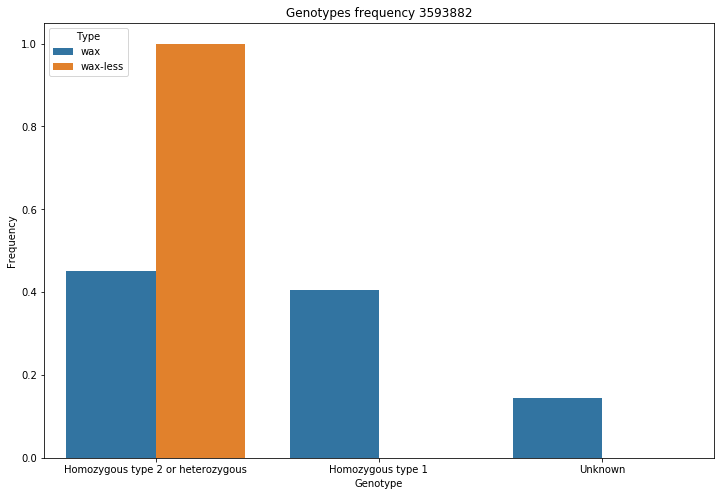

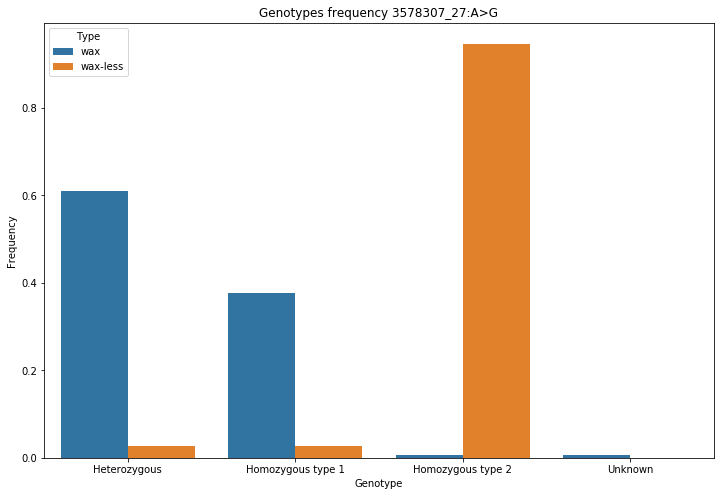

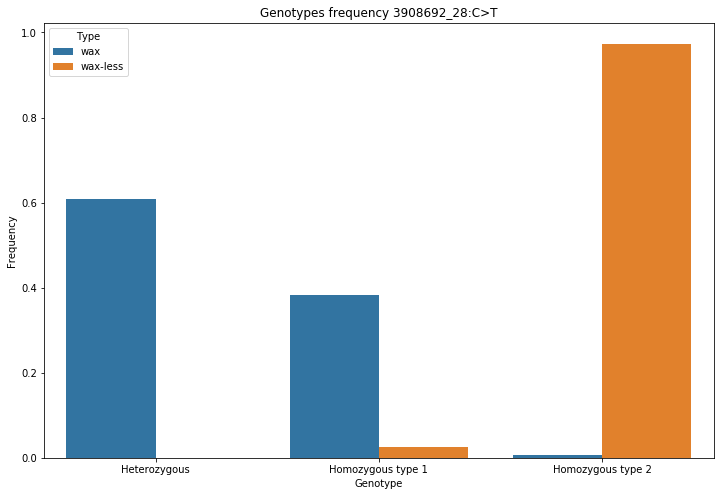

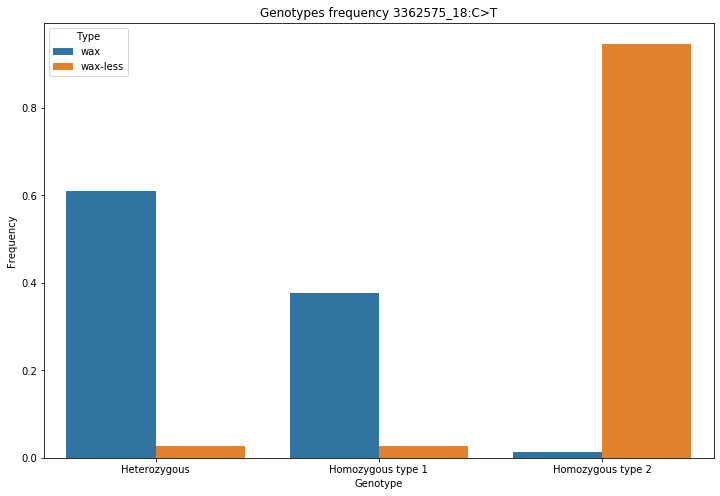

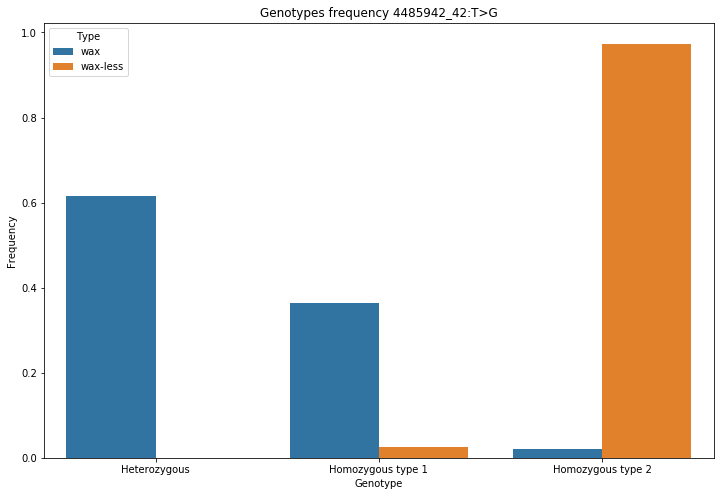

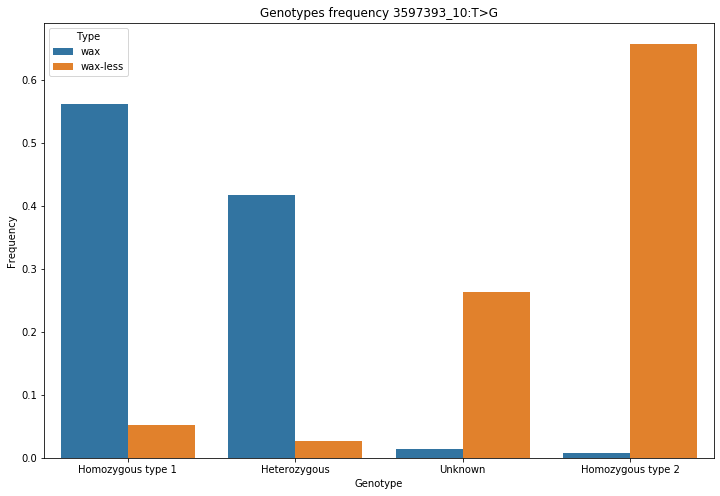

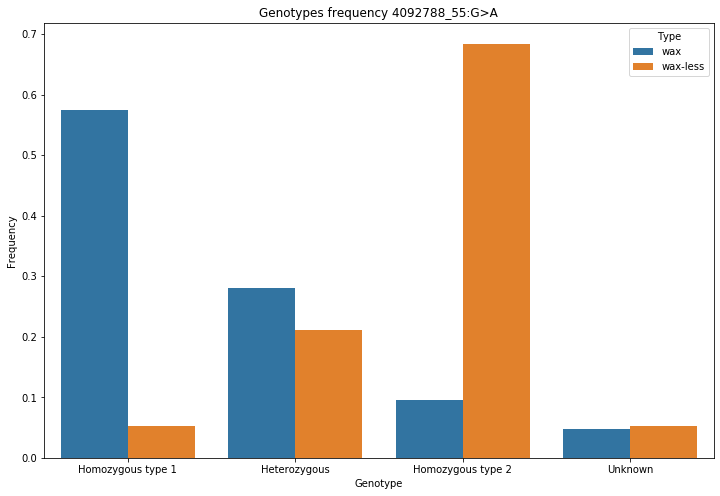

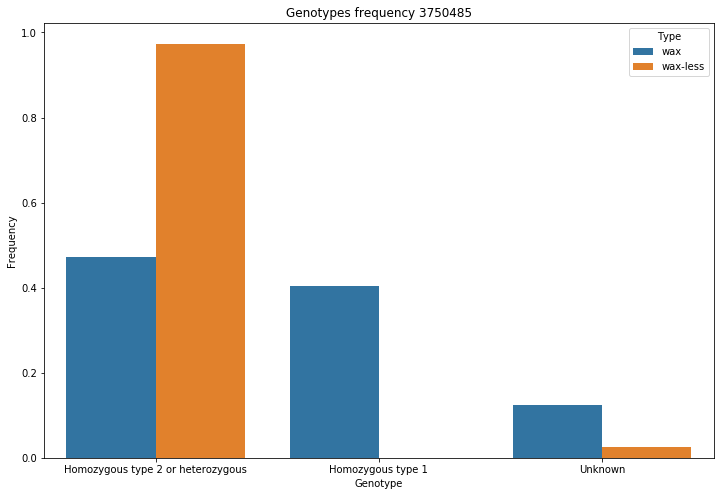

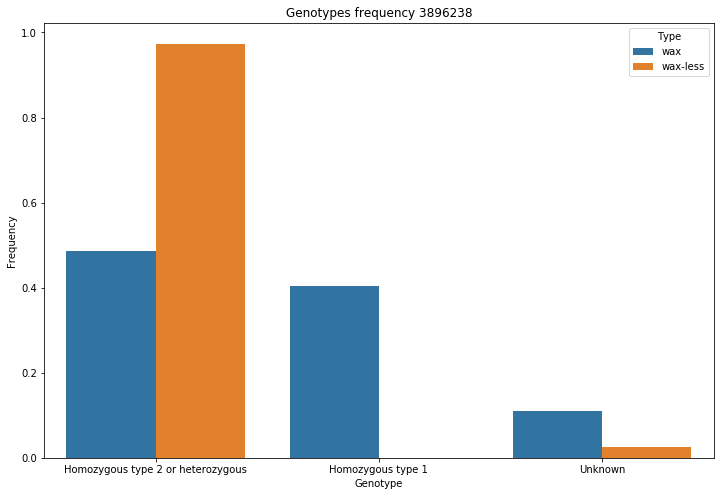

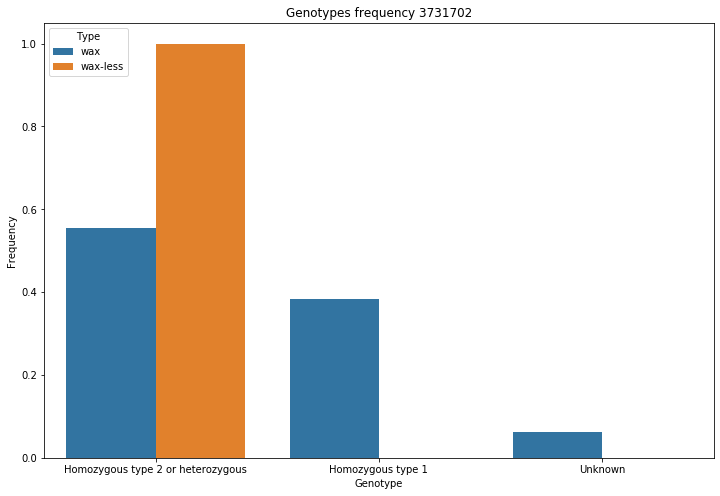

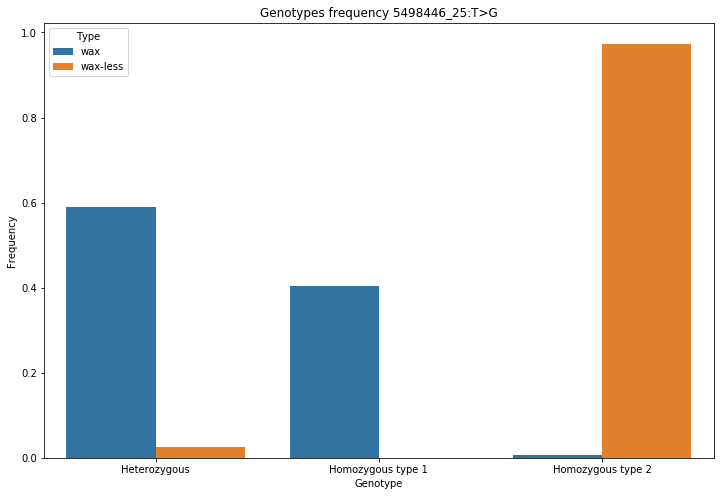

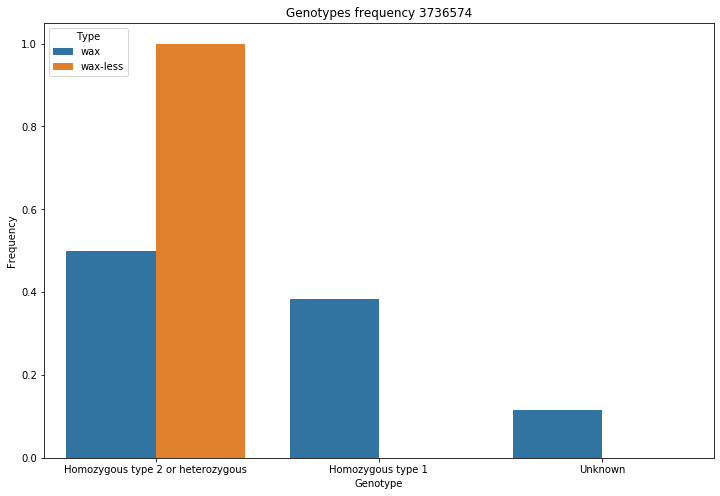

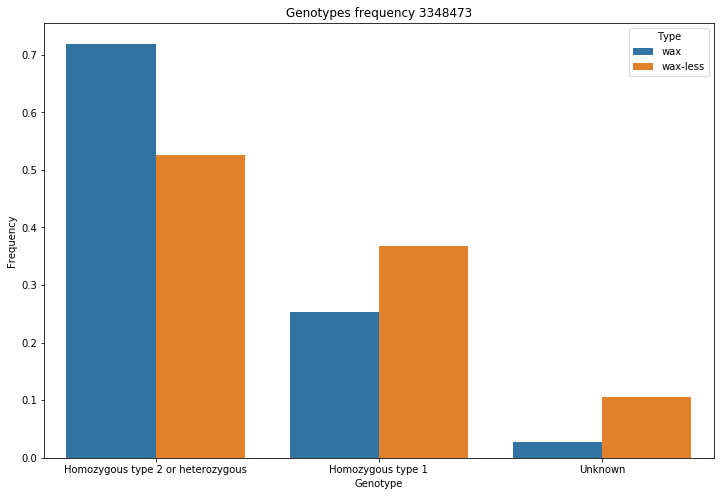

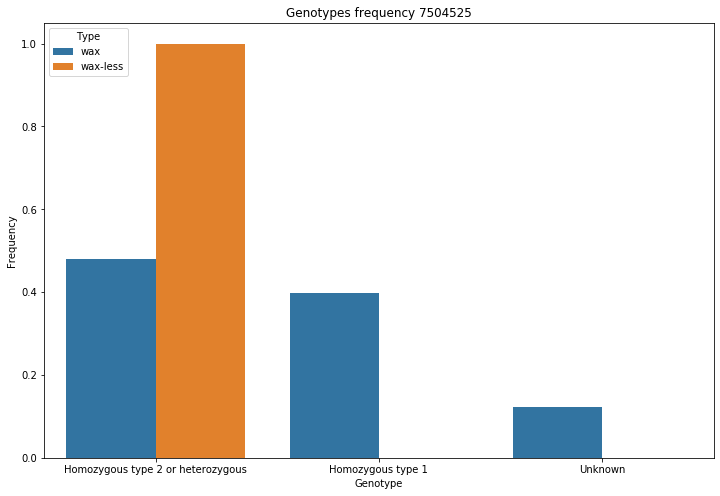

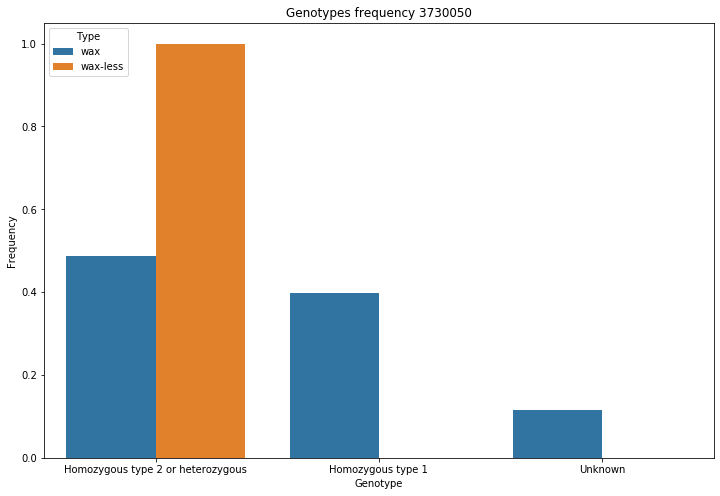

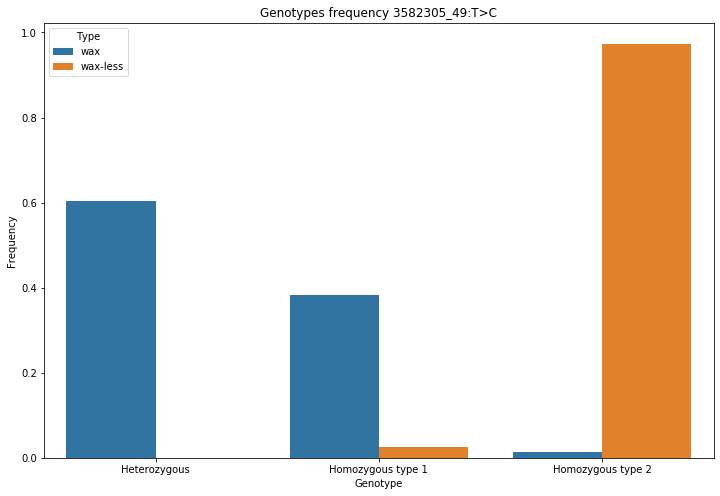

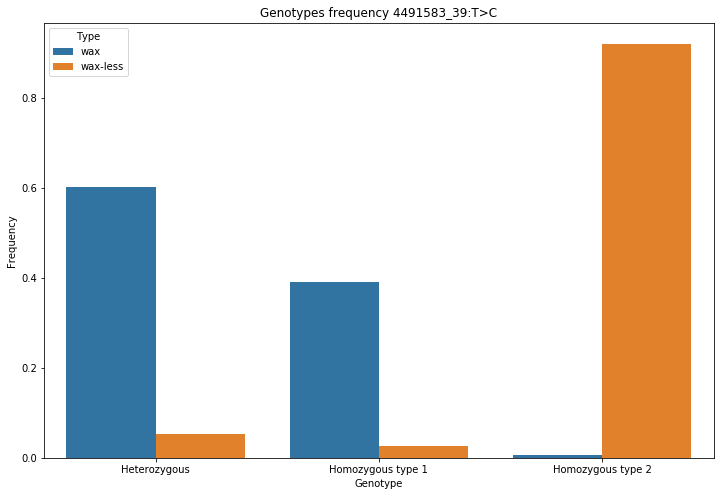

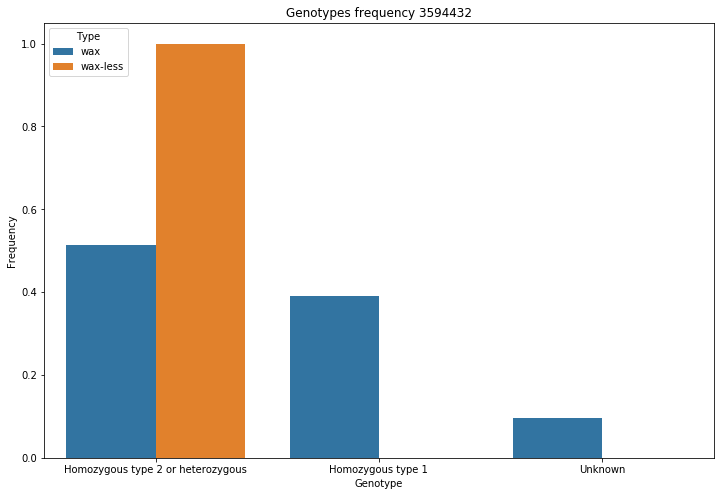

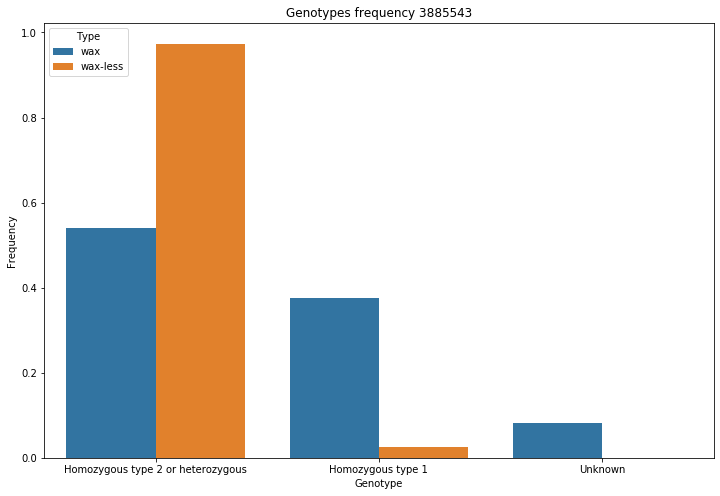

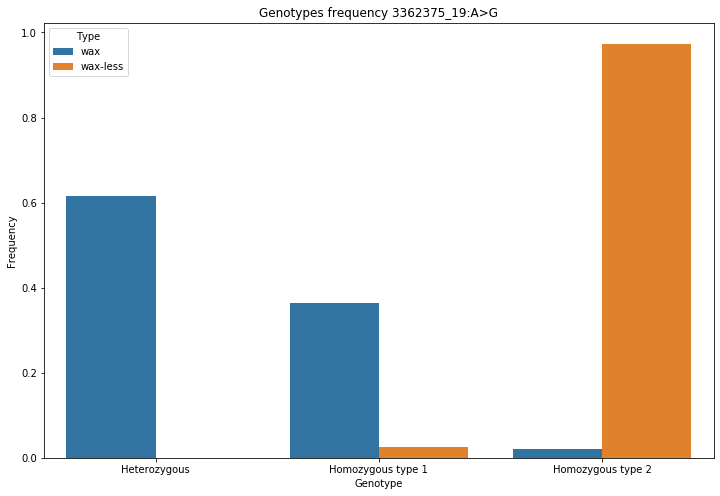

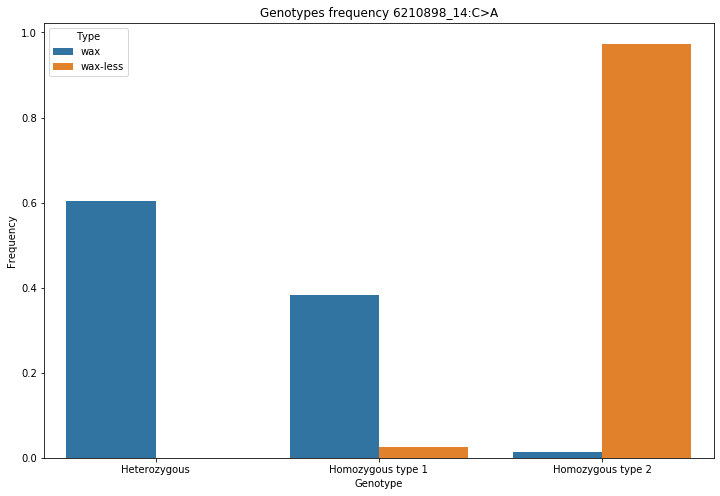

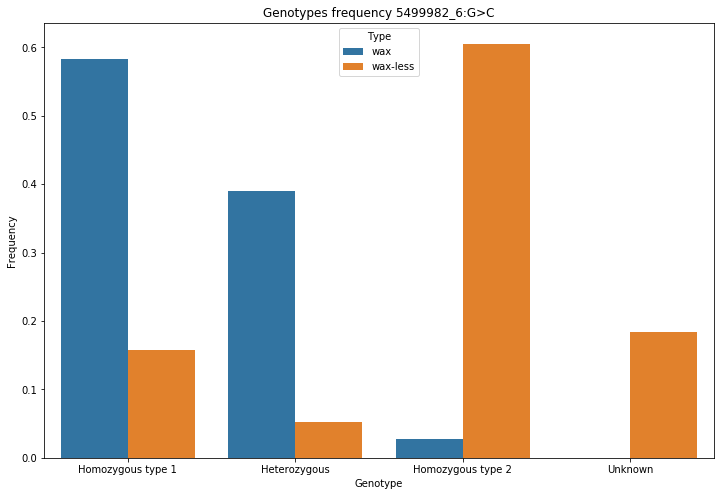

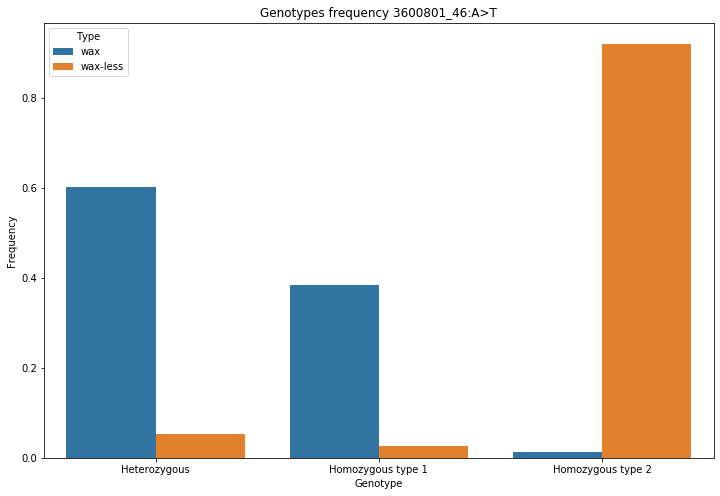

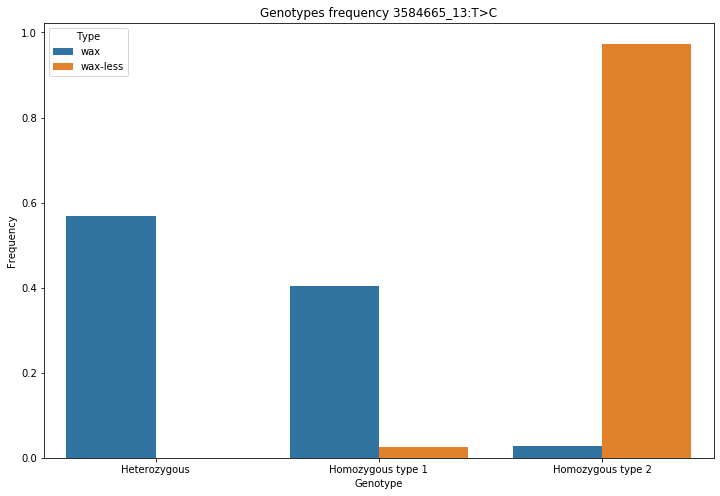

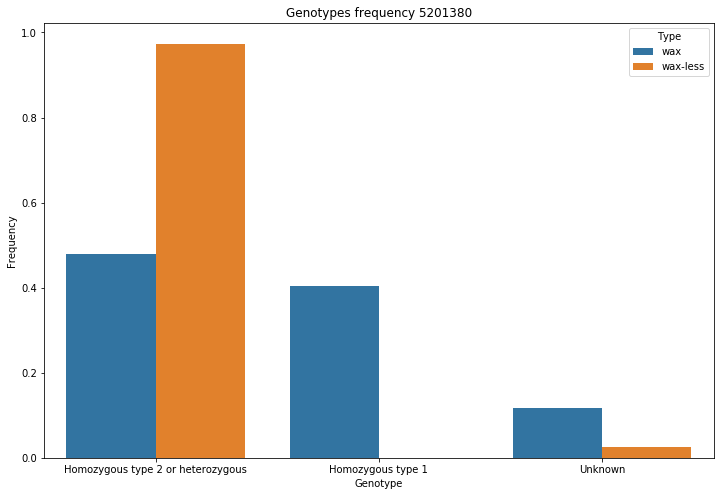

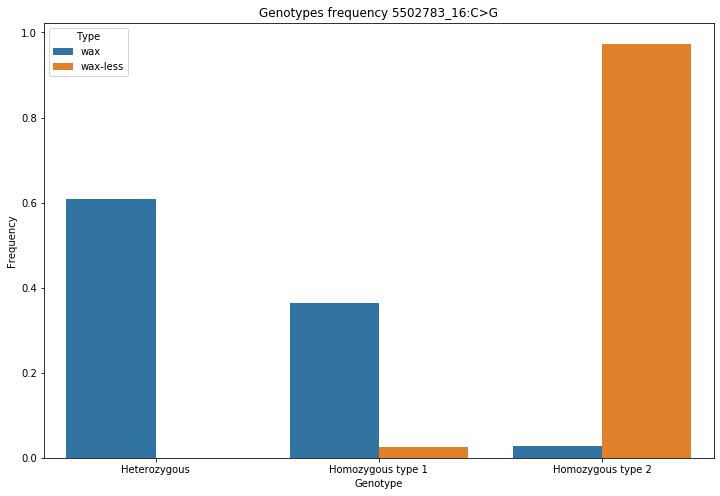

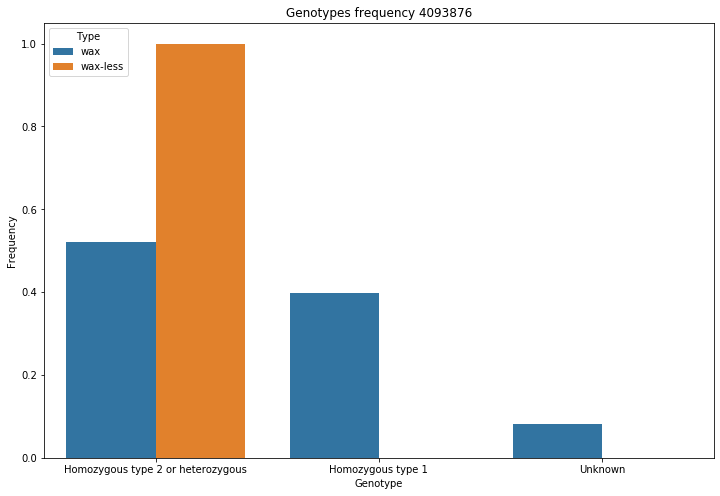

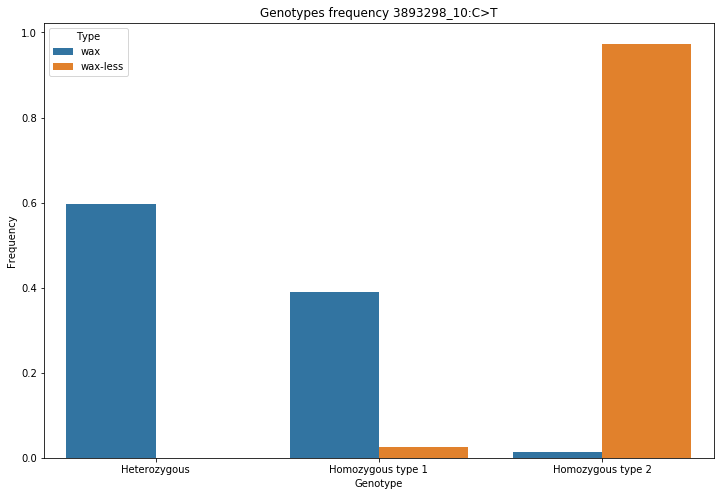

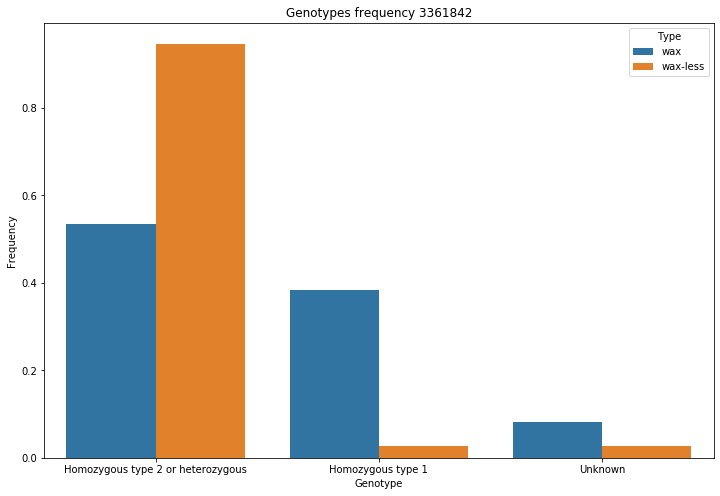

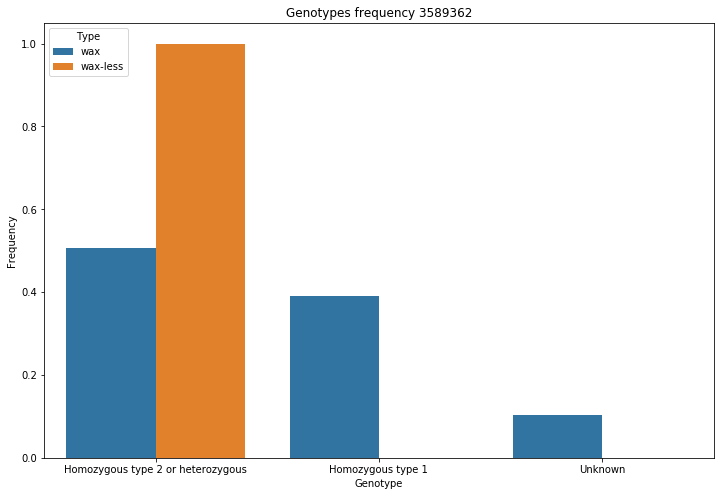

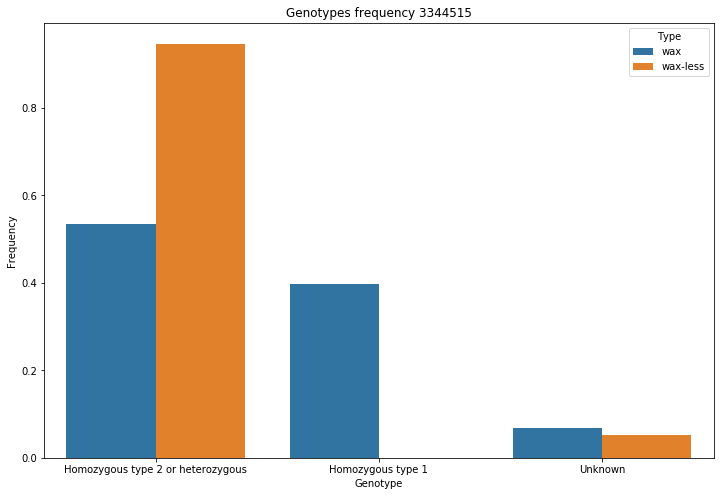

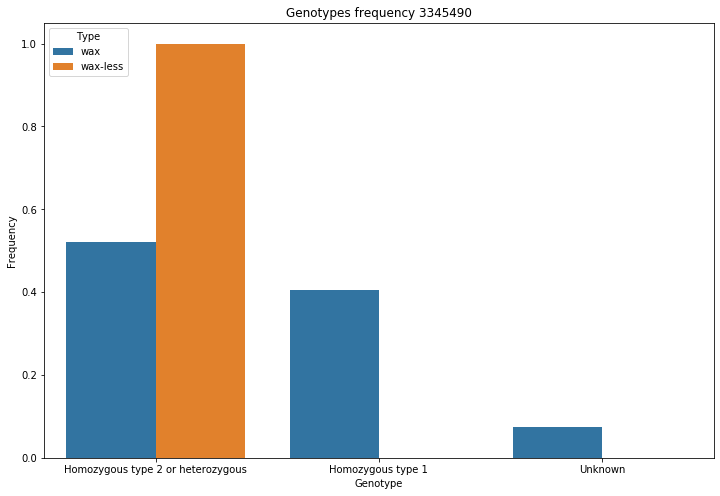

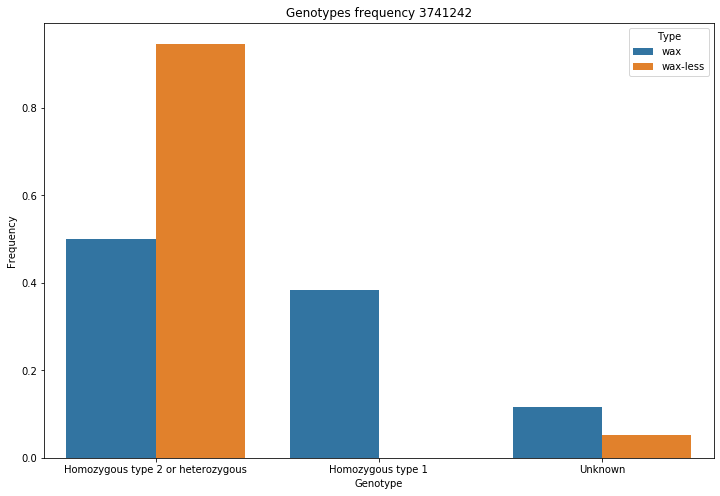

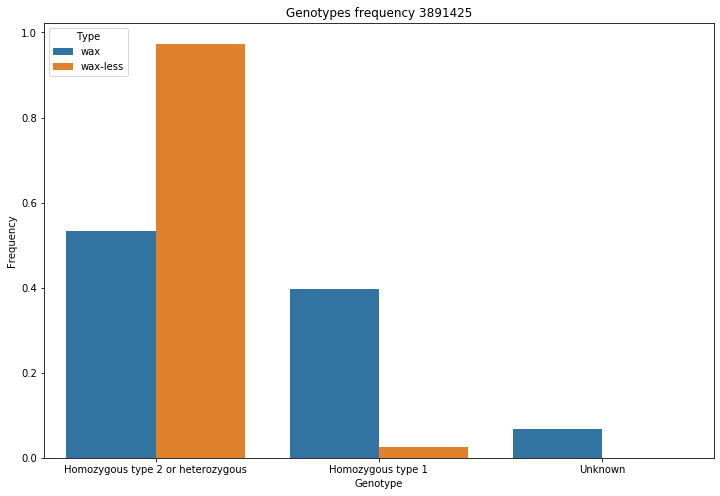

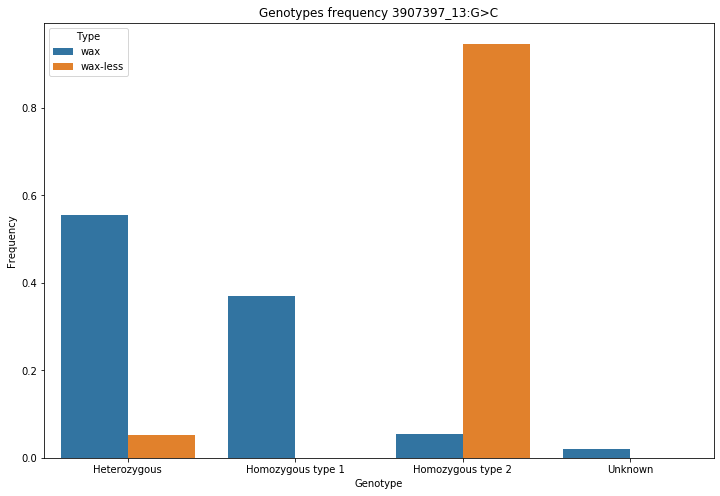

In [168]:
for marker in markers_B:
    data = selected_data_B[[marker, "wax_F2"]]
    
    wax = data[data["wax_F2"] == "wax"][marker].value_counts() / data[data["wax_F2"] == "wax"][marker].shape[0]
    wax_less = data[data["wax_F2"] == "wax-less"][marker].value_counts() / data[data["wax_F2"] == "wax-less"][marker].shape[0]
    
    summary_wax = {"Frequency": wax}
    summary_wax = pd.DataFrame.from_dict(summary_wax, orient='columns')
    summary_wax[""] = ""
    summary_wax["Type"] = "wax"
    
    summary_waxless = {"Frequency": wax_less}
    summary_waxless = pd.DataFrame.from_dict(summary_waxless, orient='columns')
    summary_waxless[""] = ""
    summary_waxless["Type"] = "wax-less"
    
    summary = pd.concat((summary_wax, summary_waxless), axis=0)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot()
    ax.set_title(f"Genotypes frequency {marker}")
    ax.set_xlabel("Genotype")
    sns.barplot(data=summary, x=summary.index, y="Frequency", hue="Type", ax=ax)
    
    plt.show()
    fig.savefig(f"../data/processed/plots/set_B/{marker}.png")
    del fig